In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import us
from census import Census
from us import states
#from census_data import 

# Census API Key
from config import api_key
api_key
c = Census(api_key, year=2013)
c1 = Census(api_key,year=2017)

In [7]:
manufacturing_data = c.acs1.get(("NAME", "B24040_008E", "B24040_112E" , "B24040_010E", "B24040_114E","B24040_014E", "B24040_118E", "B24040_043E", "B24040_016E"),{'for': 'state: 06, 48, 26, 39, 17'})
manufacturing_data_df=pd.DataFrame(manufacturing_data)   
manufacturing_data_df = manufacturing_data_df.rename(columns={"B24040_008E": "Male-Food",
                                      "B24040_112E": "Female-Food",
                                    "B24040_010E" : "Male-Textile Mills and Products",
                                    "B24040_114E" : "Female-Textile Mills and Products",
                                    "B24040_014E" : "Male-Paper",
                                    "B24040_118E" : "Female-Paper",
                                    "B24040_043E" : "Male-Petroleum and Coal",
                                    "B24040_016E" : "Female-Petroleum and Coal"
                                                              })
manufacturing_data_df.set_index("NAME", inplace=True)
manufacturing_data_df = manufacturing_data_df[np.isfinite(manufacturing_data_df['Male-Food'])]
manufacturing_data_df["Total Food"] = manufacturing_data_df["Male-Food"].astype(int) + manufacturing_data_df["Female-Food"].astype(int)
manufacturing_data_df["Total Textile"] = manufacturing_data_df["Male-Textile Mills and Products"].astype(int) + manufacturing_data_df["Female-Textile Mills and Products"].astype(int)
manufacturing_data_df["Total Paper"] = manufacturing_data_df["Male-Paper"].astype(int) + manufacturing_data_df["Female-Paper"].astype(int)
manufacturing_data_df["Total Petroleum and Coal"] = manufacturing_data_df["Male-Petroleum and Coal"].astype(int) + manufacturing_data_df["Female-Petroleum and Coal"].astype(int)
manufacturing_data_df.head()

,Male-Food,Male-Textile Mills and Products,Male-Paper,Female-Petroleum and Coal,Male-Petroleum and Coal,Female-Food,Female-Textile Mills and Products,Female-Paper,state,Total Food,Total Textile,Total Paper,Total Petroleum and Coal
NAME,,,,,,,,,,,,,
California,87129.0,8080.0,12760.0,14800.0,6007.0,53727.0,7265.0,3467.0,06,140856,15345,16227,20807
Illinois,51501.0,1581.0,9785.0,6336.0,1820.0,29165.0,2254.0,4063.0,17,80666,3835,13848,8156
Michigan,20080.0,1659.0,9452.0,1292.0,1520.0,10571.0,1561.0,1972.0,26,30651,3220,11424,2812
Ohio,32157.0,3490.0,15551.0,5484.0,1965.0,16126.0,1313.0,4927.0,39,48283,4803,20478,7449
Texas,47602.0,4013.0,11535.0,48809.0,19775.0,27517.0,2909.0,4877.0,48,75119,6922,16412,68584


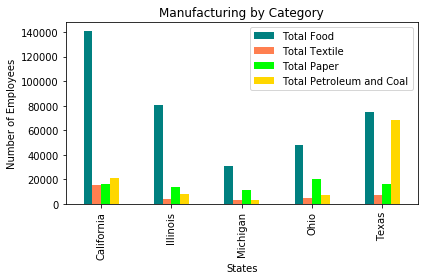

In [8]:
top_5_total=manufacturing_data_df[["Total Food", "Total Textile", "Total Paper", "Total Petroleum and Coal"]]
top_5_total.plot.bar(color=("teal", "coral", "lime", "gold"))
plt.title("Manufacturing by Category")
plt.xlabel("States")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/Manufacturing.png")   
plt.show()

In [139]:
IT_data = c.acs1.get(("NAME","B24010_020E", "B24010_171E", "B24010_022E",  "B24010_173E", "B24010_023E", "B24010_174E", "B24010_024E",  "B24010_175E" ),{'for': 'state:06, 48,36,12,17'})
IT_data_df=pd.DataFrame(IT_data)   
IT_data_df = IT_data_df.rename(columns={"B24010_020E": "Male-Computer and Math",
                                      "B24010_171E": "Female-Computer and Math",
                                    "B24010_022E" : "Male-Information Research Scientists and Analysts",
                                    "B24010_173E" : "Female-Information Research Scientists and Analysts",
                                    "B24010_023E" : "Male-Software developers and programmers",
                                    "B24010_174E" : "Female-Software developers and programmers",
                                    "B24010_024E" : "Male-Database and systems administrators and network architects",
                                    "B24010_175E" : "Female-Database and systems administrators and network architects",
                                    
                                                              })

IT_data_df["Total Comp and Math"] = IT_data_df["Male-Computer and Math"].astype(int) + IT_data_df["Female-Computer and Math"].astype(int)
IT_data_df["Total Information Research Scientists"] = IT_data_df["Male-Information Research Scientists and Analysts"].astype(int) + IT_data_df["Female-Information Research Scientists and Analysts"].astype(int)
IT_data_df["Total Software developers"] = IT_data_df["Male-Software developers and programmers"].astype(int) + IT_data_df["Female-Software developers and programmers"].astype(int)
IT_data_df["Total Database and Systems administrators"] = IT_data_df["Male-Database and systems administrators and network architects"].astype(int) + IT_data_df["Female-Database and systems administrators and network architects"].astype(int)
IT_data_df.head()
IT_data_df.set_index("NAME", inplace=True)

IT_data_df.head()

,Male-Computer and Math,Male-Information Research Scientists and Analysts,Male-Software developers and programmers,Male-Database and systems administrators and network architects,Female-Computer and Math,Female-Information Research Scientists and Analysts,Female-Software developers and programmers,Female-Database and systems administrators and network architects,state,Total Comp and Math,Total Information Research Scientists,Total Software developers,Total Database and Systems administrators
NAME,,,,,,,,,,,,,
California,391822.0,45021.0,219231.0,38662.0,127253.0,24802.0,59782.0,10082.0,06,519075,69823,279013,48744
Florida,131718.0,17931.0,56889.0,15342.0,43618.0,8952.0,13035.0,4589.0,12,175336,26883,69924,19931
Illinois,123669.0,19416.0,50302.0,15431.0,44869.0,11227.0,15274.0,3474.0,17,168538,30643,65576,18905
New York,158005.0,22702.0,68385.0,19341.0,54977.0,10912.0,21434.0,4942.0,36,212982,33614,89819,24283
Texas,230197.0,33065.0,98218.0,27047.0,77666.0,16540.0,27220.0,7956.0,48,307863,49605,125438,35003


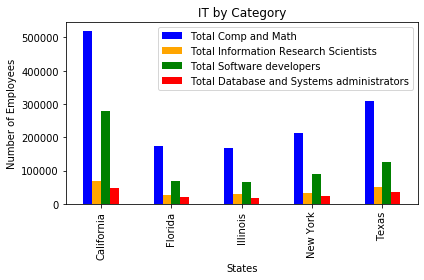

In [140]:
top_5_total_IT=IT_data_df[["Total Comp and Math", "Total Information Research Scientists", "Total Software developers", "Total Database and Systems administrators"]]
top_5_total_IT.plot.bar(color=("blue", "orange", "green", "red"))
plt.title("IT by Category")
plt.xlabel("States")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/IT.png")   
plt.show()


In [13]:
def func_merge_df(df1, df2, column):
   mf_df = pd.merge(df1, df2, on=column, how='inner')
   return mf_df

def func_getdata(key1, key2, jobtype):
   male_data= []
   female_data = []
   state_dict = us.states.mapping('fips', 'name')

   male_data=c1.acs1.get(key1, {'for': 'state:*'})
   female_data=c1.acs1.get(key2, {'for': 'state:*'})
   m_pd = pd.DataFrame(male_data)
   f_pd = pd.DataFrame(female_data)
   # Merge the dataframe
   mf_df = func_merge_df(df1=f_pd, df2=m_pd, column='state')
   mf_df=mf_df.fillna(0)
   # Get the total
   mf_df["State Name"] = ''
   mf_df["Type"] = ''
   # Get the State name
   for index, row in mf_df.iterrows():
       mf_df.loc[index,'State Name'] = state_dict[mf_df.loc[index,'state']]
       mf_df.loc[index,'Type'] = jobtype
   return mf_df

In [10]:
food_data = c.acs1.get(("NAME", "B24040_008E","B24010_112E"),{'for': 'state: 06, 48, 26, 39, 17'})
food_data_df=pd.DataFrame(food_data)   
food_data_df = food_data_df.rename(columns={"B24040_008E": "Male-Food",
                                      "B24010_112E": "Female-Food"})
food_data_df["Total Food"] = food_data_df["Male-Food"].astype(int) + food_data_df["Female-Food"].astype(int)

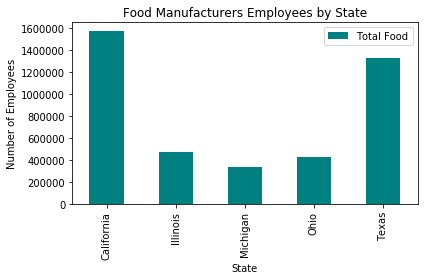

In [11]:
food_data_df_2=food_data_df[["NAME","Total Food"]]
food_data_df_2.plot.bar("NAME","Total Food",color="teal")
plt.title("Food Manufacturers Employees by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/Food.png")   
plt.show()

In [143]:
textile_data = c.acs1.get(("NAME", "B24010_022E" , "B24040_114E" ),{'for': 'state: 06, 48, 26, 39, 17'})
textile_data_df=pd.DataFrame(textile_data)   
textile_data_df = textile_data_df.rename(columns={"B24010_022E" : "Male-Textile Mills and Products",
                                    "B24040_114E" : "Female-Textile Mills and Products"})
textile_data_df
textile_data_df["Total Textile"] = textile_data_df["Male-Textile Mills and Products"].astype(int) + textile_data_df["Female-Textile Mills and Products"].astype(int)                                                                                                                                                                                                                                                                                                                                                                                                      
    

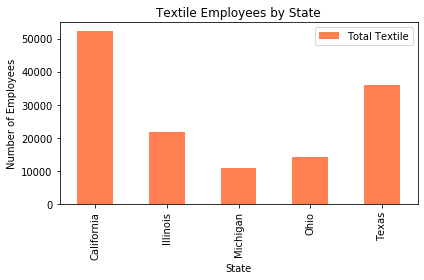

In [144]:
textile_data_df_2=textile_data_df[["NAME","Total Textile"]]
textile_data_df_2.plot.bar("NAME","Total Textile", color="coral")
plt.title("Textile Employees by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/Textile.png")   
plt.show()

In [145]:
coal_data = c.acs1.get(("NAME", "B24040_043E","B24040_120E"),{'for': 'state: 06, 48, 26, 39, 17'})
coal_data_df=pd.DataFrame(coal_data)   
coal_data_df = coal_data_df.rename(columns={"B24040_043E": "Male-Petroleum and Coal",
                                      "B24040_120E": "Female-Petroleum and Coal"})
coal_data_df["Total Petroleum and Coal"] = coal_data_df["Male-Petroleum and Coal"].astype(int) + coal_data_df["Female-Petroleum and Coal"].astype(int)


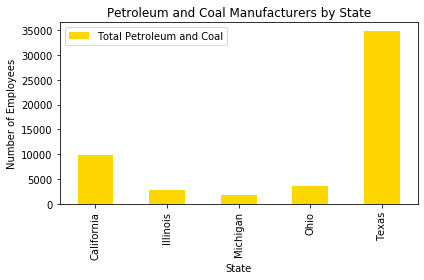

In [146]:
coal_df_2=coal_data_df[["NAME","Total Petroleum and Coal"]]
coal_df_2.plot.bar("NAME","Total Petroleum and Coal",color="gold")
plt.title("Petroleum and Coal Manufacturers by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/Coal.png")   
plt.show()

In [148]:
computer_math_data = c.acs1.get(("NAME","B24010_020E" ,"B24010_171E"),{'for': 'state: 06, 48,36,12,17'})
computer_math_data_df=pd.DataFrame(computer_math_data)   
computer_math_data_df = computer_math_data_df.rename(columns={"B24010_020E": "Male-Computer and Math",
                                      "B24010_171E": "Female-Computer and Math"})
computer_math_data_df["Total Computer and Math"] = computer_math_data_df["Male-Computer and Math"].astype(int) + computer_math_data_df["Female-Computer and Math"].astype(int)


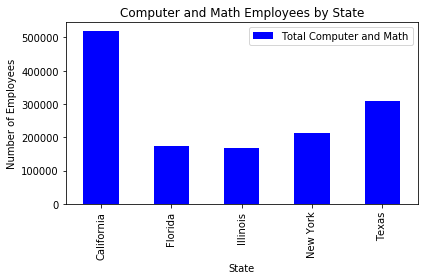

In [149]:
computer_math_df_2=computer_math_data_df[["NAME","Total Computer and Math"]]
computer_math_df_2.plot.bar("NAME","Total Computer and Math",color="blue")
plt.title("Computer and Math Employees by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/computer_and_math.png")   
plt.show()

In [151]:
research_scientists_data = c.acs1.get(("NAME", "B24010_022E","B24010_173E"),{'for': 'state: 06, 48,36,12,17'})
research_scientists_data_df=pd.DataFrame(research_scientists_data)   
research_scientists_data_df = research_scientists_data_df.rename(columns={"B24010_022E": "Male-Information Research Scientists",
                                      "B24010_173E": "Female-Information Research Scientists"})
research_scientists_data_df
research_scientists_data_df["Total Information Research Scientists"] = research_scientists_data_df["Male-Information Research Scientists"].astype(int) + research_scientists_data_df["Female-Information Research Scientists"].astype(int)


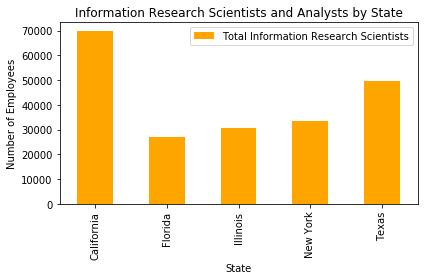

In [152]:
research_scientists_df_2=research_scientists_data_df[["NAME","Total Information Research Scientists"]]
research_scientists_df_2.plot.bar("NAME","Total Information Research Scientists",color="orange")
plt.title("Information Research Scientists and Analysts by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/research_scientists.png")   
plt.show()

In [153]:
software_data = c.acs1.get(("NAME", "B24010_023E","B24010_174E"),{'for': 'state: 06, 48,36,12,17'})
software_data_df=pd.DataFrame(software_data)   
software_data_df = software_data_df.rename(columns={"B24010_023E": "Male-Software Developers and Programmers",
                                      "B24010_174E": "Female-Software Developers and Programmers"})
software_data_df
software_data_df["Total Software Developers and Programmers"] = software_data_df["Male-Software Developers and Programmers"].astype(int) + software_data_df["Female-Software Developers and Programmers"].astype(int)

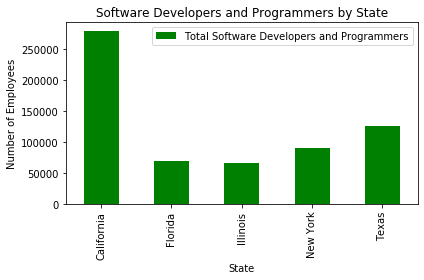

In [154]:
software_df_2=software_data_df[["NAME","Total Software Developers and Programmers"]]
software_df_2.plot.bar("NAME","Total Software Developers and Programmers",color="green")
plt.title("Software Developers and Programmers by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/software.png")   
plt.show()

In [155]:
database_data = c.acs1.get(("NAME","B24010_024E","B24010_175E"),{'for': 'state: 06, 48,36,12,17'})
database_data_df=pd.DataFrame(database_data)   
database_data_df = database_data_df.rename(columns={"B24010_024E": "Male-Database and System Administrators",
                                      "B24010_175E" : "Female-Database and System Administrators"})
database_data_df
database_data_df["Total Database and System Administrators"] = database_data_df["Male-Database and System Administrators"].astype(int) + database_data_df["Female-Database and System Administrators"].astype(int)



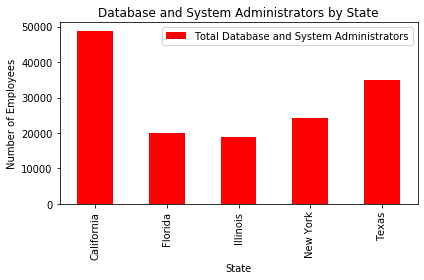

In [156]:
database_df_2=database_data_df[["NAME","Total Database and System Administrators"]]
database_df_2.plot.bar("NAME","Total Database and System Administrators",color="red")
plt.title("Database and System Administrators by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/database.png")   
plt.show()

In [157]:
paper_data = c.acs1.get(("NAME", "B24040_014E" , "B24040_118E" ),{'for': 'state: 06, 48, 26, 39, 17'})
paper_data_df=pd.DataFrame(paper_data)   
paper_data_df = paper_data_df.rename(columns={"B24040_014E" : "Male-Paper",
                                    "B24040_118E" : "Female-Paper"})
paper_data_df
paper_data_df["Total Paper"] = paper_data_df["Male-Paper"].astype(int) + paper_data_df["Female-Paper"].astype(int)                                                                                                         



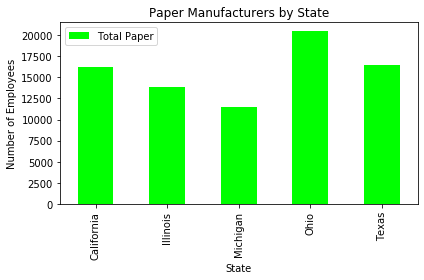

In [158]:
paper_df_2=paper_data_df[["NAME","Total Paper"]]
paper_df_2.plot.bar("NAME","Total Paper", color="lime")
plt.title("Paper Manufacturers by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/paper.png")   
plt.show()

In [18]:
#socialwork
cnt = 1
input_data=[{'Male':'B24010_066E','Female':'B24010_217E','jobtype':'Psychiatric'},
          {'Male':'B24010_038E','Female':'B24010_189E','jobtype':'Religious'},
          {'Male':'B24010_037E','Female':'B24010_188E','jobtype':'Counselers'},
          {'Male':'B24010_091E','Female':'B24010_242E','jobtype':'Child Care'}
         ]
input_df = pd.DataFrame(input_data)
input_df

key1_val = 'B24010_066E'
key2_val = 'B24010_217E'
jobtypeVal = 'Psychiatric'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female"})
rs_data["Total Psychiatry"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
psychiatry= rs_data[["State Name", "Type","Male", "Female","Total Psychiatry"]]
psychiatry_df=psychiatry.rename(columns={"State Name": "State Name Psychiatry"})
array = ['California', 'New York','Texas', 'Pennsylvania', 'Florida']
psychiatry_df.loc[psychiatry_df['State Name Psychiatry'].isin(array)]

,State Name Psychiatry,Type,Male,Female,Total Psychiatry
4,California,Psychiatric,26395.0,112185.0,138580
9,Florida,Psychiatric,18957.0,121072.0,140029
32,New York,Psychiatric,27098.0,227533.0,254631
38,Pennsylvania,Psychiatric,11350.0,81139.0,92489
43,Texas,Psychiatric,22135.0,125627.0,147762


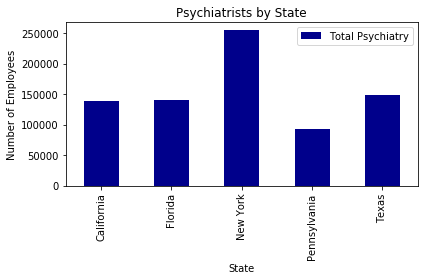

In [123]:
psychiatry.loc[psychiatry['State Name'].isin(array)].plot.bar("State Name","Total Psychiatry", color="darkblue")
plt.title("Psychiatrists by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/psychiatry.png")   
plt.show()

In [19]:
key1_val = 'B24010_038E'
key2_val = 'B24010_189E'
jobtypeVal = 'Religious'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
rs_data["Total Religion"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total Religion"]]
religion=rs_data.sort_values('Total Religion', ascending=False).head()
religion_df=religion.rename(columns={"State Name": "State Name Religion"})
array = ['California', 'New York','Texas', 'Pennsylvania', 'Florida']
religion_df.loc[religion_df['State Name Religion'].isin(array)]

,State Code,State Name Religion,Type,Male,Female,Total Religion
4,06,California,Religious,39478.0,20834.0,60312
43,48,Texas,Religious,33695.0,14795.0,48490
9,12,Florida,Religious,25401.0,11460.0,36861
38,42,Pennsylvania,Religious,18505.0,8663.0,27168
32,36,New York,Religious,18996.0,7819.0,26815


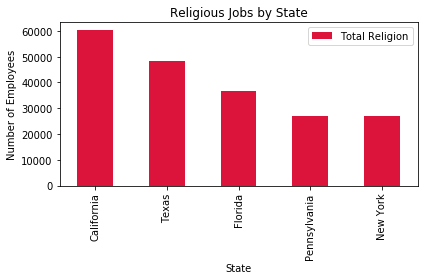

In [122]:
religion.loc[religion['State Name'].isin(array)].plot.bar("State Name","Total Religion", color="crimson")
plt.title("Religious Jobs by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/religion.png")   
plt.show()

In [14]:
key1_val = 'B24010_037E'
key2_val = 'B24010_188E'
jobtypeVal = 'Counselors'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
rs_data["Total Counselors"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total Counselors"]]
counselors=rs_data.sort_values('Total Counselors', ascending=False).head()
array = ['California', 'New York','Texas', 'Pennsylvania', 'Florida']
counselors.loc[counselors['State Name'].isin(array)]

,State Code,State Name,Type,Male,Female,Total Counselors
4,06,California,Counselors,66326.0,185081.0,251407
32,36,New York,Counselors,45515.0,137849.0,183364
43,48,Texas,Counselors,28644.0,105919.0,134563
38,42,Pennsylvania,Counselors,29250.0,74910.0,104160
9,12,Florida,Counselors,23239.0,76424.0,99663


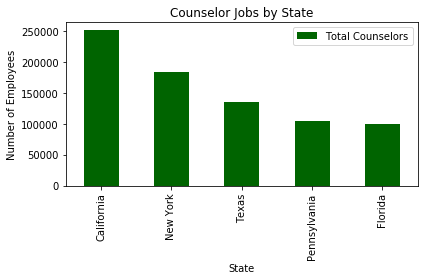

In [15]:
counselors.loc[counselors['State Name'].isin(array)].plot.bar("State Name","Total Counselors", color="darkgreen")
plt.title("Counselor Jobs by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/counselor.png")   
plt.show()

In [20]:
key1_val = 'B24010_091E'
key2_val = 'B24010_242E'
jobtypeVal = 'Child Care'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
rs_data["Total Child Care"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
child_care= rs_data[["State Code", "State Name", "Type","Male", "Female","Total Child Care"]]
child_care_df=child_care.rename(columns={"State Name": "State Name Child Care"})
child_care_df
array = ['California', 'New York','Texas', 'Florida', 'Pennsylvania']
child_care_df.loc[child_care_df['State Name Child Care'].isin(array)]

,State Code,State Name Child Care,Type,Male,Female,Total Child Care
4,06,California,Child Care,14948.0,153040.0,167988
9,12,Florida,Child Care,3887.0,49141.0,53028
32,36,New York,Child Care,6629.0,107009.0,113638
38,42,Pennsylvania,Child Care,3700.0,41908.0,45608
43,48,Texas,Child Care,7149.0,98652.0,105801


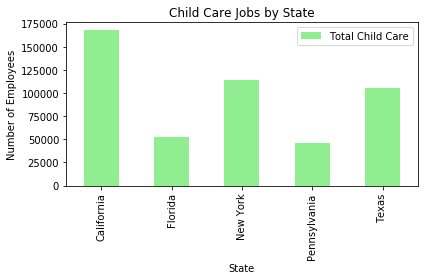

In [127]:
child_care.loc[child_care['State Name'].isin(array)].plot.bar("State Name","Total Child Care", color="lightgreen")
plt.title("Child Care Jobs by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/childcare.png")   
plt.show()

In [17]:
#top states
cnt = 0

input_data=[{'Male':'B24010_037E','Female':'B24010_188E','jobtype':'Social Workers'}]
#input_data=[{'Male':'B24010_017E','Female':'B24010_168E','jobtype':'Finance'}]
input_df = pd.DataFrame(input_data)

for index, row in input_df.iterrows():
   filter_df = input_df[input_df['jobtype']==input_df.loc[index,'jobtype']]
   key1_val = ','.join(str(v) for v in filter_df['Male'])
   key2_val = ','.join(str(v) for v in filter_df['Female'])
   jobtypeVal = ','.join(str(v) for v in filter_df['jobtype'])

   rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
   rs_data
   rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
   rs_data["Total"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
   rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total"]]
   final_df = rs_data.sort_values('Total', ascending=False).head()

final_df

,State Code,State Name,Type,Male,Female,Total
4,06,California,Social Workers,66326.0,185081.0,251407
32,36,New York,Social Workers,45515.0,137849.0,183364
43,48,Texas,Social Workers,28644.0,105919.0,134563
38,42,Pennsylvania,Social Workers,29250.0,74910.0,104160
9,12,Florida,Social Workers,23239.0,76424.0,99663


In [51]:
cnt = 0

#input_data=[{'Male':'B24010_037E','Female':'B24010_188E','jobtype':'Social Workers'}]
input_data=[{'Male':'B24010_017E','Female':'B24010_168E','jobtype':'Finance'}]
input_df = pd.DataFrame(input_data)

for index, row in input_df.iterrows():
   filter_df = input_df[input_df['jobtype']==input_df.loc[index,'jobtype']]
   key1_val = ','.join(str(v) for v in filter_df['Male'])
   key2_val = ','.join(str(v) for v in filter_df['Female'])
   jobtypeVal = ','.join(str(v) for v in filter_df['jobtype'])

   rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
   rs_data
   rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
   rs_data["Total"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
   rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total"]]
   final_df = rs_data.sort_values('Total', ascending=False).head()

final_df

,State Code,State Name,Type,Male,Female,Total
4,06,California,Finance,96296.0,166105.0,262401
43,48,Texas,Finance,66063.0,111583.0,177646
32,36,New York,Finance,70341.0,76617.0,146958
9,12,Florida,Finance,46604.0,73860.0,120464
38,42,Pennsylvania,Finance,38436.0,45509.0,83945


In [ ]:
#Finance
cnt = 1
input_data=[{'Male':'B24010_105E','Female':'B24010_256E','jobtype':'Audit Clerk'},
          {'Male':'B24010_016E','Female':'B24010_167E','jobtype':'Specialist'},
          {'Male':'B24010_008E','Female':'B24010_159E','jobtype':'Finance Manager'},
          {'Male':'B24010_017E','Female':'B24010_168E','jobtype':'Accountants'}
         ]

key1_val = 'B24010_105E'
key2_val = 'B24010_256E'
jobtypeVal = 'Audit Clerk'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
rs_data["Total"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total"]]
rs_data.sort_values('Total', ascending=False).head()

In [21]:
key1_val = 'B24010_105E'
key2_val = 'B24010_256E'
jobtypeVal = 'Audit Clerk'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
rs_data["Total Audit"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total Audit"]]
audit=rs_data.sort_values('Total Audit', ascending=False)
audit_df=audit.rename(columns={"State Name": "State Name Audit"})
array = ['California', 'New York','Texas', 'Pennsylvania', 'Florida']
audit_df.loc[audit_df['State Name Audit'].isin(array)]

,State Code,State Name Audit,Type,Male,Female,Total Audit
4,06,California,Audit Clerk,26429.0,109060.0,135489
43,48,Texas,Audit Clerk,22245.0,84325.0,106570
32,36,New York,Audit Clerk,22872.0,65604.0,88476
9,12,Florida,Audit Clerk,14684.0,59654.0,74338
38,42,Pennsylvania,Audit Clerk,8869.0,50030.0,58899


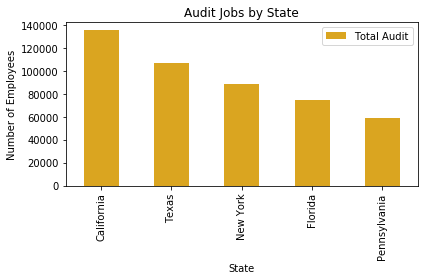

In [128]:
audit.loc[audit['State Name'].isin(array)].plot.bar("State Name","Total Audit", color="goldenrod")
plt.title("Audit Jobs by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/audit.png")   
plt.show()

In [22]:
key1_val='B24010_016E'
key2_val = 'B24010_167E'
jobtypeVal = 'Specialist'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
rs_data["Total Specialist"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total Specialist"]]
specialist=rs_data.sort_values('Total Specialist', ascending=False)
specialist_df=specialist.rename(columns={"State Name": "State Name Specialist"})
array = ['California', 'New York','Texas', 'Pennsylvania', 'Florida']
specialist_df.loc[specialist_df['State Name Specialist'].isin(array)]

,State Code,State Name Specialist,Type,Male,Female,Total Specialist
4,06,California,Specialist,184630.0,242654.0,427284
43,48,Texas,Specialist,127323.0,164795.0,292118
32,36,New York,Specialist,139095.0,115074.0,254169
9,12,Florida,Specialist,92427.0,114036.0,206463
38,42,Pennsylvania,Specialist,68583.0,72925.0,141508


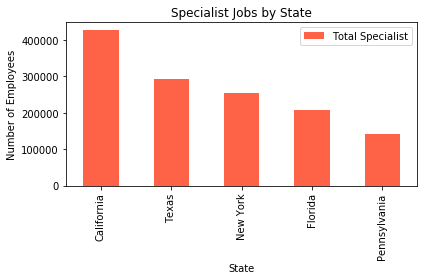

In [129]:
specialist.loc[specialist['State Name'].isin(array)].plot.bar("State Name","Total Specialist", color="tomato")
plt.title("Specialist Jobs by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/specialist.png")   
plt.show()

In [106]:
key1_val='B24010_008E'
key2_val = 'B24010_159E'
jobtypeVal = 'Finance Manager'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
rs_data["Total Finance"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total Finance"]]
finance=rs_data.sort_values('Total Finance', ascending=False)
finance_df=finance.rename(columns={"State Name": "State Name Finance"})
array = ['California', 'New York','Texas', 'Pennsylvania', 'Florida']
finance_df.loc[finance_df['State Name Finance'].isin(array)]

,State Code,State Name Finance,Type,Male,Female,Total Finance
4,06,California,Finance Manager,64697.0,68911.0,133608
43,48,Texas,Finance Manager,46612.0,51504.0,98116
32,36,New York,Finance Manager,51556.0,43449.0,95005
9,12,Florida,Finance Manager,36984.0,36547.0,73531
38,42,Pennsylvania,Finance Manager,22541.0,24652.0,47193


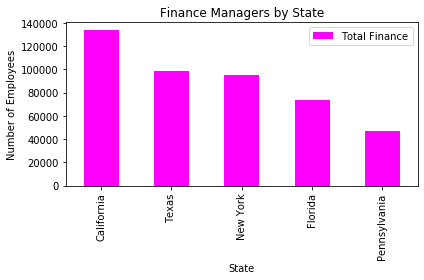

In [130]:
finance.loc[finance['State Name'].isin(array)].plot.bar("State Name","Total Finance", color="magenta")
plt.title("Finance Managers by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/finance.png")   
plt.show()

In [112]:
key1_val='B24010_017E'
key2_val = 'B24010_168E'
jobtypeVal = 'Accountants'

rs_data = func_getdata(key1 = key1_val, key2 = key2_val, jobtype = jobtypeVal)
rs_data
rs_data = rs_data.rename(columns={key1_val: "Male",key2_val:"Female","state": "State Code"})
rs_data["Total Accountant"] = rs_data["Male"].astype(int) + rs_data["Female"].astype(int)
rs_data = rs_data[["State Code", "State Name", "Type","Male", "Female","Total Accountant"]]
accountants=rs_data.sort_values('Total Accountant', ascending=False)
array = ['California', 'New York','Texas', 'Pennsylvania', 'Florida']
accountants.loc[accountants['State Name'].isin(array)]

,State Code,State Name,Type,Male,Female,Total Accountant
4,06,California,Accountants,96296.0,166105.0,262401
43,48,Texas,Accountants,66063.0,111583.0,177646
32,36,New York,Accountants,70341.0,76617.0,146958
9,12,Florida,Accountants,46604.0,73860.0,120464
38,42,Pennsylvania,Accountants,38436.0,45509.0,83945


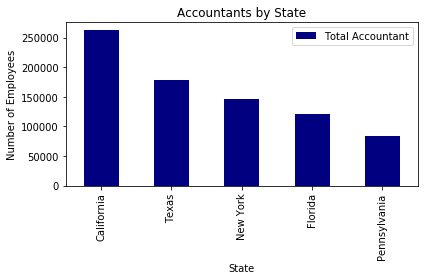

In [132]:
accountants.loc[accountants['State Name'].isin(array)].plot.bar("State Name","Total Accountant", color="navy")
plt.title("Accountants by State")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/accountants.png")   
plt.show()

In [23]:
social_work = pd.concat([psychiatry_df.loc[psychiatry_df['State Name Psychiatry'].isin(array)].reset_index(drop=True),
               religion_df.loc[religion_df['State Name Religion'].isin(array)].reset_index(drop=True),
                         counselors.loc[counselors['State Name'].isin(array)].reset_index(drop=True),
                        child_care_df.loc[child_care_df['State Name Child Care'].isin(array)].reset_index(drop=True)], axis=1)
social_work

,State Name Psychiatry,Type,Male,Female,Total Psychiatry,State Code,State Name Religion,Type,Male,Female,...,Type,Male,Female,Total Counselors,State Code,State Name Child Care,Type,Male,Female,Total Child Care
0,California,Psychiatric,26395.0,112185.0,138580,06,California,Religious,39478.0,20834.0,...,Counselors,66326.0,185081.0,251407,06,California,Child Care,14948.0,153040.0,167988
1,Florida,Psychiatric,18957.0,121072.0,140029,48,Texas,Religious,33695.0,14795.0,...,Counselors,45515.0,137849.0,183364,12,Florida,Child Care,3887.0,49141.0,53028
2,New York,Psychiatric,27098.0,227533.0,254631,12,Florida,Religious,25401.0,11460.0,...,Counselors,28644.0,105919.0,134563,36,New York,Child Care,6629.0,107009.0,113638
3,Pennsylvania,Psychiatric,11350.0,81139.0,92489,42,Pennsylvania,Religious,18505.0,8663.0,...,Counselors,29250.0,74910.0,104160,42,Pennsylvania,Child Care,3700.0,41908.0,45608
4,Texas,Psychiatric,22135.0,125627.0,147762,36,New York,Religious,18996.0,7819.0,...,Counselors,23239.0,76424.0,99663,48,Texas,Child Care,7149.0,98652.0,105801


In [24]:
social_work_graph=social_work[["State Name", "Total Psychiatry", "Total Religion", "Total Counselors", "Total Child Care"]]
social_work_graph.set_index("State Name", inplace=True)
social_work_graph

,Total Psychiatry,Total Religion,Total Counselors,Total Child Care
State Name,,,,
California,138580,60312,251407,167988
New York,140029,48490,183364,53028
Texas,254631,36861,134563,113638
Pennsylvania,92489,27168,104160,45608
Florida,147762,26815,99663,105801


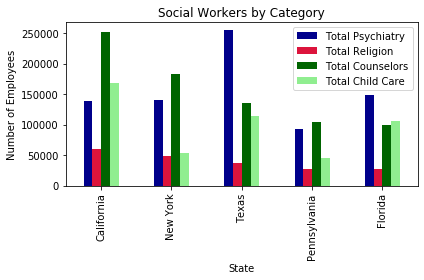

In [25]:
top_5_total_social=social_work_graph[["Total Psychiatry", "Total Religion", "Total Counselors", "Total Child Care"]]
top_5_total_social.plot.bar(color=("darkblue","crimson", "darkgreen", "lightgreen"))
plt.title("Social Workers by Category")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/Social_Work.png")   
plt.show()

In [113]:
finance_combined = pd.concat([audit_df.loc[audit_df['State Name Audit'].isin(array)].reset_index(drop=True),
              specialist_df.loc[specialist_df['State Name Specialist'].isin(array)].reset_index(drop=True),
                        finance_df.loc[finance_df['State Name Finance'].isin(array)].reset_index(drop=True),
                        accountants.loc[accountants['State Name'].isin(array)].reset_index(drop=True)], axis=1)
finance_combined

,State Code,State Name Audit,Type,Male,Female,Total Audit,State Code,State Name Specialist,Type,Male,...,Type,Male,Female,Total Finance,State Code,State Name,Type,Male,Female,Total Accountant
0,06,California,Audit Clerk,26429.0,109060.0,135489,06,California,Specialist,184630.0,...,Finance Manager,64697.0,68911.0,133608,06,California,Accountants,96296.0,166105.0,262401
1,48,Texas,Audit Clerk,22245.0,84325.0,106570,48,Texas,Specialist,127323.0,...,Finance Manager,46612.0,51504.0,98116,48,Texas,Accountants,66063.0,111583.0,177646
2,36,New York,Audit Clerk,22872.0,65604.0,88476,36,New York,Specialist,139095.0,...,Finance Manager,51556.0,43449.0,95005,36,New York,Accountants,70341.0,76617.0,146958
3,12,Florida,Audit Clerk,14684.0,59654.0,74338,12,Florida,Specialist,92427.0,...,Finance Manager,36984.0,36547.0,73531,12,Florida,Accountants,46604.0,73860.0,120464
4,42,Pennsylvania,Audit Clerk,8869.0,50030.0,58899,42,Pennsylvania,Specialist,68583.0,...,Finance Manager,22541.0,24652.0,47193,42,Pennsylvania,Accountants,38436.0,45509.0,83945


In [117]:
finance_graph=finance_combined[["State Name", "Total Audit", "Total Specialist", "Total Finance", "Total Accountant"]]
finance_graph.set_index("State Name", inplace=True)
finance_graph

,Total Audit,Total Specialist,Total Finance,Total Accountant
State Name,,,,
California,135489,427284,133608,262401
Texas,106570,292118,98116,177646
New York,88476,254169,95005,146958
Florida,74338,206463,73531,120464
Pennsylvania,58899,141508,47193,83945


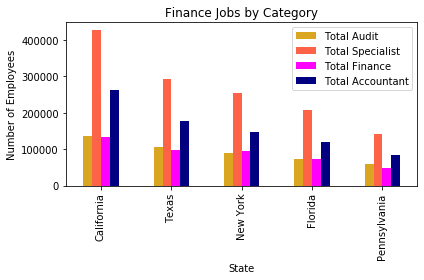

In [134]:
top_5_total_finance=finance_graph[["Total Audit", "Total Specialist", "Total Finance", "Total Accountant"]]
top_5_total_finance.plot.bar(color=("goldenrod","tomato", "magenta", "navy" ))
plt.title("Finance Jobs by Category")
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig("SubCategory_Graphs/Finance_Jobs.png")   
plt.show()